In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter, defaultdict
import numpy as np
from scipy import stats
from scipy.special import boxcox1p
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(rc={'figure.figsize':(11.7,9)})

In [2]:
#load salary data 

df = pd.read_csv("salary_data.csv")
df.shape

(1477, 25)

In [3]:
#drop duplicate job postings 

df1 = df.drop_duplicates(subset=['City', 'Company', 'Internship'], keep='last')
df1.shape

(1385, 25)

In [4]:
#drop non-US job postings with non-us currency values 

df1 = df1[df1["Headquarter"] != "Bangalore, India"].reset_index(drop=True)
df1 = df1.drop(502).reset_index(drop=True)

In [5]:
#cleaning base pay and total pay column values to convert to numeric 

df1["Base_Pay"] = df1["Base_Pay"].str.replace("$", "")
df1["Base_Pay"] = df1["Base_Pay"].str.replace(",", "")
df1["Base_Pay"] = df1["Base_Pay"].str.replace("US", "")
df1["Base_Pay"] = df1["Base_Pay"].str.replace(" ", "")

df1["Total_Pay"] = df1["Total_Pay"].str.replace("$", "")
df1["Total_Pay"] = df1["Total_Pay"].str.replace(",", "")
df1["Total_Pay"] = df1["Total_Pay"].str.replace("US", "")
df1["Total_Pay"] = df1["Total_Pay"].str.replace(" ", "")

df1["Low"] = df1["Low"].str.replace("$", "")
df1["Low"] = df1["Low"].str.replace(",", "")
df1["Low"] = df1["Low"].str.replace("US", "")
df1["Low"] = df1["Low"].str.replace(" ", "")
df1["Low"] = df1["Low"].str.replace("K", "000")

df1["25_%"] = df1["25_%"].str.replace("$", "")
df1["25_%"] = df1["25_%"].str.replace(",", "")
df1["25_%"] = df1["25_%"].str.replace("US", "")
df1["25_%"] = df1["25_%"].str.replace(" ", "")
df1["25_%"] = df1["25_%"].str.replace("K", "000")

df1["75_%"] = df1["75_%"].str.replace("$", "")
df1["75_%"] = df1["75_%"].str.replace(",", "")
df1["75_%"] = df1["75_%"].str.replace("US", "")
df1["75_%"] = df1["75_%"].str.replace(" ", "")
df1["75_%"] = df1["75_%"].str.replace("K", "000")

df1["High"] = df1["High"].str.replace("$", "")
df1["High"] = df1["High"].str.replace(",", "")
df1["High"] = df1["High"].str.replace("US", "")
df1["High"] = df1["High"].str.replace(" ", "")
df1["High"] = df1["High"].str.replace("K", "000")

df1["Reviews"] = df1["Reviews"].str.replace(".", "")
df1["Reviews"] = df1["Reviews"].str.replace(" ", "")
df1["Reviews"] = df1["Reviews"].str.replace("k", "00")

df1["Jobs"] = df1["Jobs"].str.replace(".", "")
df1["Jobs"] = df1["Jobs"].str.replace(" ", "")
df1["Jobs"] = df1["Jobs"].str.replace("--", "0")
df1["Jobs"] = df1["Jobs"].str.replace("k", "00")

df1["Salaries"] = df1["Salaries"].str.replace(".", "")
df1["Salaries"] = df1["Salaries"].str.replace(" ", "")
df1["Salaries"] = df1["Salaries"].str.replace("k", "00")

df1["Interviews"] = df1["Interviews"].str.replace(".", "")
df1["Interviews"] = df1["Interviews"].str.replace(" ", "")
df1["Interviews"] = df1["Interviews"].str.replace("k", "00")

df1["Benefits"] = df1["Benefits"].str.replace(".", "")
df1["Benefits"] = df1["Benefits"].str.replace(" ", "")
df1["Benefits"] = df1["Benefits"].str.replace("k", "00")

df1["Additional_Pay_Avg"] = df1["Additional_Pay_Avg"].str.replace("$", "")
df1["Additional_Pay_Avg"] = df1["Additional_Pay_Avg"].str.replace(",", "")
df1["Additional_Pay_Avg"] = df1["Additional_Pay_Avg"].str.replace("US", "")
df1["Additional_Pay_Avg"] = df1["Additional_Pay_Avg"].str.replace(" ", "")
df1["Additional_Pay_Avg"] = df1["Additional_Pay_Avg"].str.replace("Avg", "")

df1["Cash_Bonus"] = df1["Cash_Bonus"].str.replace("$", "")
df1["Cash_Bonus"] = df1["Cash_Bonus"].str.replace(",", "")
df1["Cash_Bonus"] = df1["Cash_Bonus"].str.replace("US", "")
df1["Cash_Bonus"] = df1["Cash_Bonus"].str.replace(" ", "")
df1["Cash_Bonus"] = df1["Cash_Bonus"].str.replace("Avg", "")

df1["Stock_Bonus"] = df1["Stock_Bonus"].str.replace("$", "")
df1["Stock_Bonus"] = df1["Stock_Bonus"].str.replace(",", "")
df1["Stock_Bonus"] = df1["Stock_Bonus"].str.replace("US", "")
df1["Stock_Bonus"] = df1["Stock_Bonus"].str.replace(" ", "")
df1["Stock_Bonus"] = df1["Stock_Bonus"].str.replace("Avg", "")



In [6]:
#convert columns to numeric


df1["Total_Pay"] = pd.to_numeric(df1["Total_Pay"])
df1["Low"] = pd.to_numeric(df1["Low"])
df1["25_%"] = pd.to_numeric(df1["25_%"])
df1["75_%"] = pd.to_numeric(df1["75_%"])
df1["High"] = pd.to_numeric(df1["High"])
df1["Additional_Pay_Avg"] = pd.to_numeric(df1["Additional_Pay_Avg"])
df1["Cash_Bonus"] = pd.to_numeric(df1["Cash_Bonus"])
df1["Stock_Bonus"] = pd.to_numeric(df1["Stock_Bonus"])
df1["Reviews"] = pd.to_numeric(df1["Reviews"])
df1["Jobs"] = pd.to_numeric(df1["Jobs"])
df1["Salaries"] = pd.to_numeric(df1["Salaries"])
df1["Interviews"] = pd.to_numeric(df1["Interviews"])
df1["Benefits"] = pd.to_numeric(df1["Benefits"])

In [7]:
# new data frame with split value columns
new = df1["Base_Pay"].str.split("-", n = 1, expand = True)
  
# making separate low base column from new data frame
df1["Low_Base"]= new[0]
  
# making separate dash column from new data frame
df1["High_Base"]= new[1]





In [8]:
df1["High_Base"] = df1["High_Base"].str.replace("-", "")
df1["High_Base"] = df1["High_Base"].fillna(0)



In [9]:
df1["High_Base"] = pd.to_numeric(df1["High_Base"])
df1["Low_Base"] = pd.to_numeric(df1["Low_Base"])


In [10]:

def get_average(col_1, col_2):
    average = []
    for i in range(len(col_1)):
        if col_2[i] != 0:
            average.append((col_1[i]+col_2[i])/2)
        else:
            average.append(col_1[i])
            
    return average 


df1["Salary"] = get_average(df1["Low_Base"], df1["High_Base"])


<AxesSubplot:xlabel='Salary', ylabel='Count'>

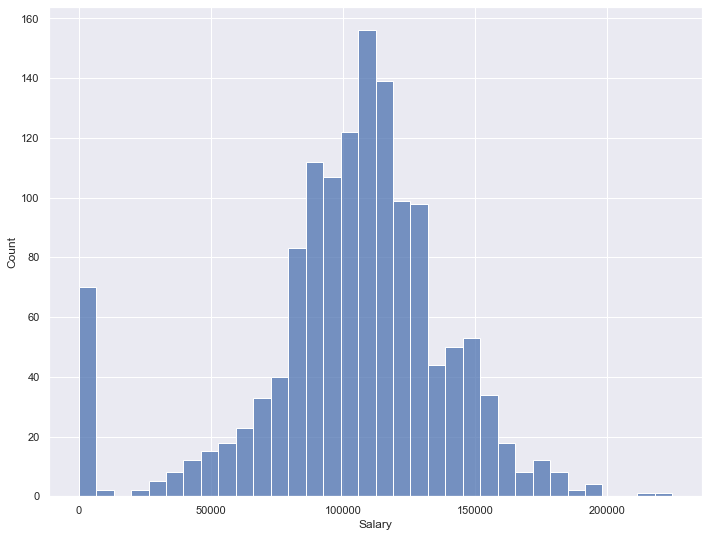

In [11]:
#look at the distribution for outcome variable
sns.histplot(data=df1, x="Salary")

In [12]:
#remove values uner 25000 as they represent monthly pay or internship in another country

df1 = df1[df1["Salary"] > 25000]

In [13]:
#look at values above 200000

df1[df1["Salary"] > 200000]

,City,Company,Size,Type,Revenue,Headquarter,Founded,Industry,Job,Internship,Base_Pay,Low,25_%,75_%,High,Additional_Pay_Avg,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Low_Base,High_Base,Salary
26,"Baltimore, MD",Verizon Media,10000+ Employees,Subsidiary or Business Segment,Unknown / Non-Applicable,"New York, NY",NaN,Internet,Verizon Media Data Scientist Salaries in Balti...,0,202613-222389,0,0,0,0,0,0,0,0,Low Confidence,997,165,3200,164,493,202613,222389,212501.0
221,"charlotte, nc",EY,10000+ Employees,Company - Private,$10+ billion (USD),"New York, NY",1989.0,Accounting,"EY Data Scientist Salaries in Charlotte, NC Area",0,214309-234984,0,0,0,0,22410,0,0,0,Low Confidence,4800,9800,9300,1200,9000,214309,234984,224646.5


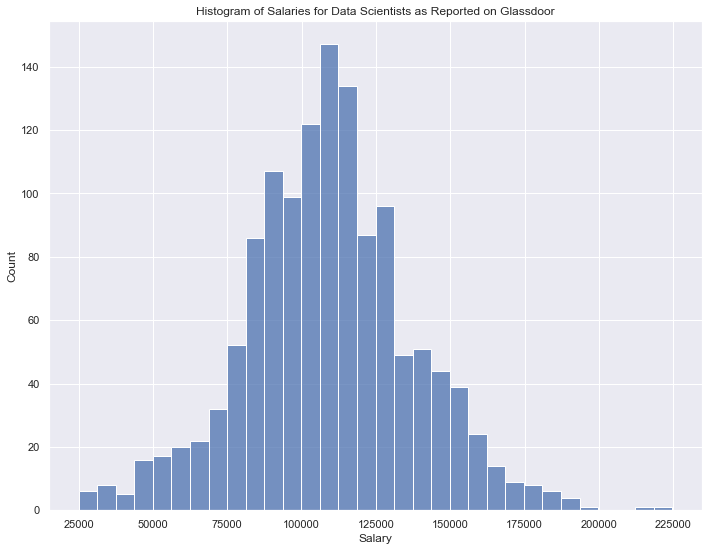

In [14]:
#check the histogram for base pay 

sal_hist = sns.histplot(x="Salary", data=df1).set_title("Histogram of Salaries for Data Scientists as Reported on Glassdoor")
figure = sal_hist.get_figure()  
figure.savefig('salary_hist.png', dpi=400)

In [15]:
df1.Salary.describe()

count      1307.000000
mean     109018.089901
std       28424.361550
min       25055.000000
25%       91374.000000
50%      108628.500000
75%      126063.250000
max      224646.500000
Name: Salary, dtype: float64

In [16]:
df1.shape

(1307, 28)

In [17]:
# new data frame with split value columns
new2 = df1["Type"].str.split("(", n = 1, expand = True)
  
# making separate low base column from new data frame
df1["Company_Type"]= new2[0]
  
# making separate dash column from new data frame
df1["Stock"]= new2[1]



In [18]:
# new data frame with split value columns
new3 = df1["Company_Type"].str.split("-", n = 1, expand = True)
  
# making separate low base column from new data frame
df1["C"]= new3[0]
  
# making separate dash column from new data frame
df1["C_Type"]= new3[1]



In [19]:
#Remove white space from company type values 

df1["Company_Type"] = df1.Company_Type.str.strip()


In [20]:
df1["Company_Type"].value_counts()

Company - Public                  698
Company - Private                 402
Subsidiary or Business Segment     79
Nonprofit Organization             43
Government                         32
0                                  22
College / University               14
Unknown                             8
Hospital                            5
Franchise                           2
Contract                            1
Private Practice / Firm             1
Name: Company_Type, dtype: int64

In [21]:
#Replace 0 value with unknown 

df1["Company_Type"] = df1["Company_Type"].replace("0", "Unknown")
df1["Company_Type"].value_counts()

Company - Public                  698
Company - Private                 402
Subsidiary or Business Segment     79
Nonprofit Organization             43
Government                         32
Unknown                            30
College / University               14
Hospital                            5
Franchise                           2
Contract                            1
Private Practice / Firm             1
Name: Company_Type, dtype: int64

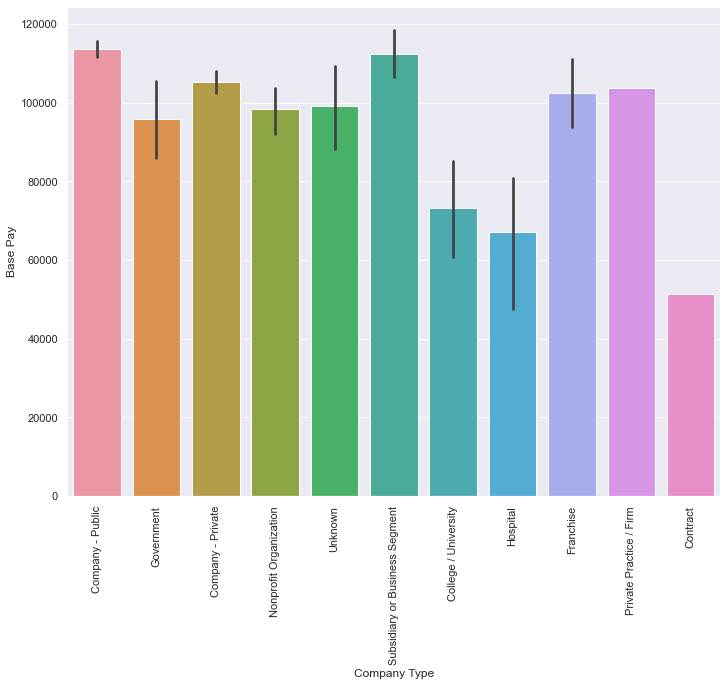

In [22]:
#bar plot of company type with target variable

sns.barplot(x=df1.Company_Type, y=df1.Salary)
  
plt.xlabel("Company Type")
plt.xticks(rotation=90)
plt.ylabel("Base Pay")
plt.show()


In [23]:
#create binary company type variable 

co_count = df1["Company_Type"].value_counts()
other_co = list(co_count[co_count < 75].index)
df1["Company_Type"] = df1["Company_Type"].replace(other_co, "Other")
df1["Company_Type"].value_counts()

Company - Public                  698
Company - Private                 402
Other                             128
Subsidiary or Business Segment     79
Name: Company_Type, dtype: int64

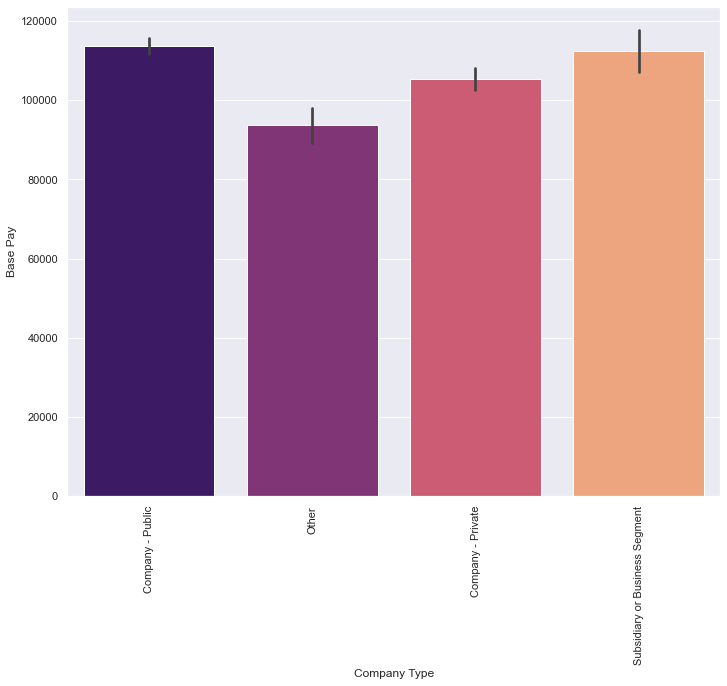

In [24]:
#bar plot of company type with target variable

sns.barplot(x=df1.Company_Type, y=df1.Salary, palette='magma')
  
plt.xlabel("Company Type")
plt.xticks(rotation=90)
plt.ylabel("Base Pay")
plt.show()

In [25]:
#get value count for revenue 

df1["Revenue"].value_counts()

$10+ billion (USD)                  481
Unknown / Non-Applicable            266
$5 to $10 billion (USD)             113
$2 to $5 billion (USD)              107
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               74
$500 million to $1 billion (USD)     43
$50 to $100 million (USD)            24
$5 to $10 million (USD)              23
0                                    22
$25 to $50 million (USD)             22
$10 to $25 million (USD)             20
Less than $1 million (USD)           15
$1 to $5 million (USD)               15
Name: Revenue, dtype: int64

In [26]:
#Replace 0 value with unknown 

df1["Revenue"] = df1["Revenue"].replace("0", "Unknown / Non-Applicable")
df1["Revenue"].value_counts()

$10+ billion (USD)                  481
Unknown / Non-Applicable            288
$5 to $10 billion (USD)             113
$2 to $5 billion (USD)              107
$100 to $500 million (USD)           82
$1 to $2 billion (USD)               74
$500 million to $1 billion (USD)     43
$50 to $100 million (USD)            24
$5 to $10 million (USD)              23
$25 to $50 million (USD)             22
$10 to $25 million (USD)             20
Less than $1 million (USD)           15
$1 to $5 million (USD)               15
Name: Revenue, dtype: int64

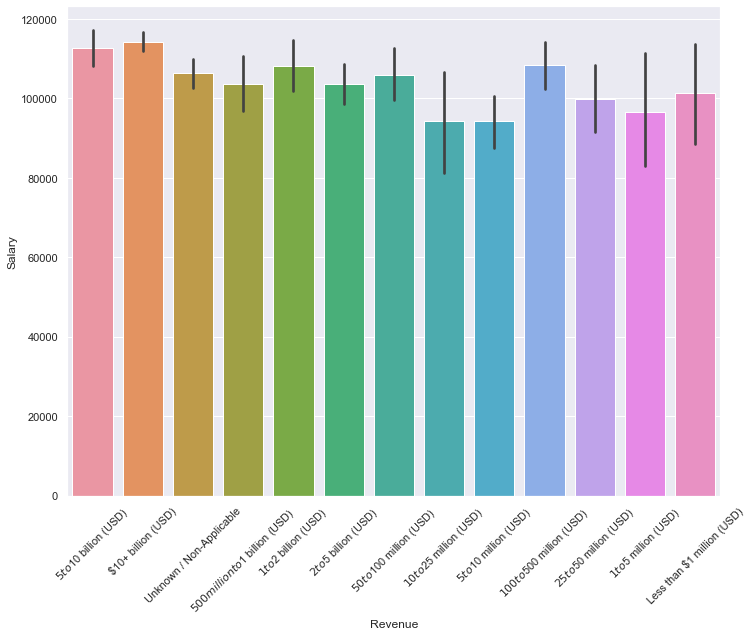

In [27]:
#bar plot of revenue with target variable

sns.barplot(x=df1.Revenue, y=df1.Salary)
  
plt.xlabel("Revenue")
plt.xticks(rotation=45)
plt.ylabel("Salary")
plt.show()

In [28]:
#create binary revenue variable 
df1["Revenue"] = df1["Revenue"].fillna(0)
rev_count = df1["Revenue"].value_counts()
small_rev = list(rev_count[rev_count < 100].index)
df1["Revenue"] = df1["Revenue"].replace(small_rev, "Less than 5 billion (USD)")
df1["Revenue"].value_counts()

$10+ billion (USD)           481
Less than 5 billion (USD)    318
Unknown / Non-Applicable     288
$5 to $10 billion (USD)      113
$2 to $5 billion (USD)       107
Name: Revenue, dtype: int64

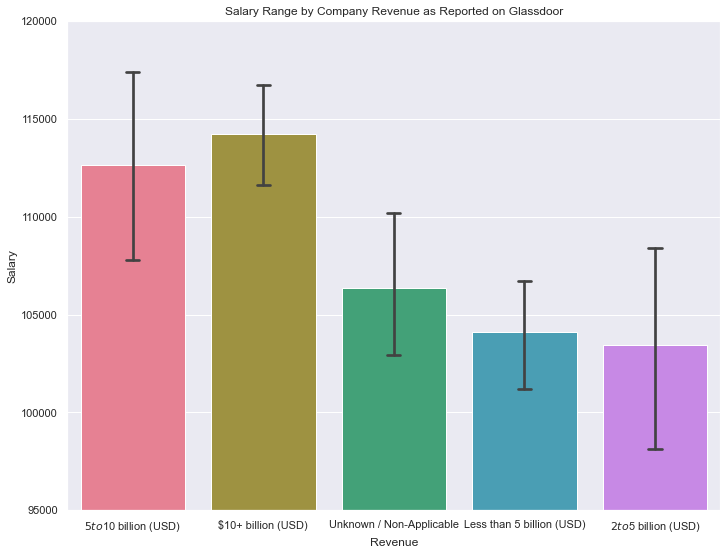

In [29]:
#bar plot of revenue with target variable

rev_bar = sns.barplot(x=df1.Revenue, y=df1.Salary, capsize=.1, palette='husl').set_title("Salary Range by Company Revenue as Reported on Glassdoor")
  
plt.xlabel("Revenue")
plt.xticks(rotation=0)
plt.ylabel("Salary")
plt.ylim(95000, 120000)
figure = rev_bar.get_figure()  
figure.savefig('revenue_bar.png', dpi=400)
plt.show()

In [30]:
#get Value caount for size of company 
df1["Size"].value_counts()

10000+ Employees           686
1001 to 5000 Employees     186
5001 to 10000 Employees    119
501 to 1000 Employees       84
51 to 200 Employees         77
1 to 50 Employees           68
201 to 500 Employees        58
0                           22
Unknown                      7
Name: Size, dtype: int64

In [31]:
#Replace 0 value with unknown 

df1["Size"] = df1["Size"].replace("0", "Unknown")
df1["Size"].value_counts()

10000+ Employees           686
1001 to 5000 Employees     186
5001 to 10000 Employees    119
501 to 1000 Employees       84
51 to 200 Employees         77
1 to 50 Employees           68
201 to 500 Employees        58
Unknown                     29
Name: Size, dtype: int64

In [32]:
#Create Less than 1000 size category 

df1["Size"] = df1["Size"].replace("51 to 200 Employees", "Less Than 1000")
df1["Size"] = df1["Size"].replace("201 to 500 Employees", "Less Than 1000")
df1["Size"] = df1["Size"].replace("501 to 1000 Employees", "Less Than 1000")
df1["Size"] = df1["Size"].replace("1 to 50 Employees", "Less Than 1000")
df1["Size"].value_counts()

10000+ Employees           686
Less Than 1000             287
1001 to 5000 Employees     186
5001 to 10000 Employees    119
Unknown                     29
Name: Size, dtype: int64

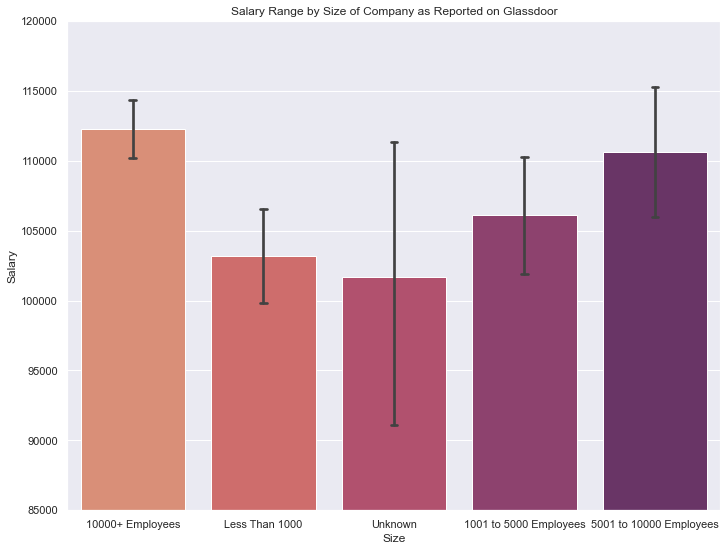

In [33]:
#bar plot of size with target variable

size_bar=sns.barplot(x=df1.Size, y=df1.Salary, capsize=.05, palette='flare').set_title("Salary Range by Size of Company as Reported on Glassdoor")
  
plt.xlabel("Size")
plt.xticks(rotation=0)
plt.ylabel("Salary")
plt.xlabel("Size")
plt.ylim(85000,120000)
figure = size_bar.get_figure()  
figure.savefig('size_bar.png', dpi=400)
plt.show()

In [34]:
df1["Confidence"].value_counts()

Low Confidence          735
Very High Confidence    383
High Confidence         189
Name: Confidence, dtype: int64

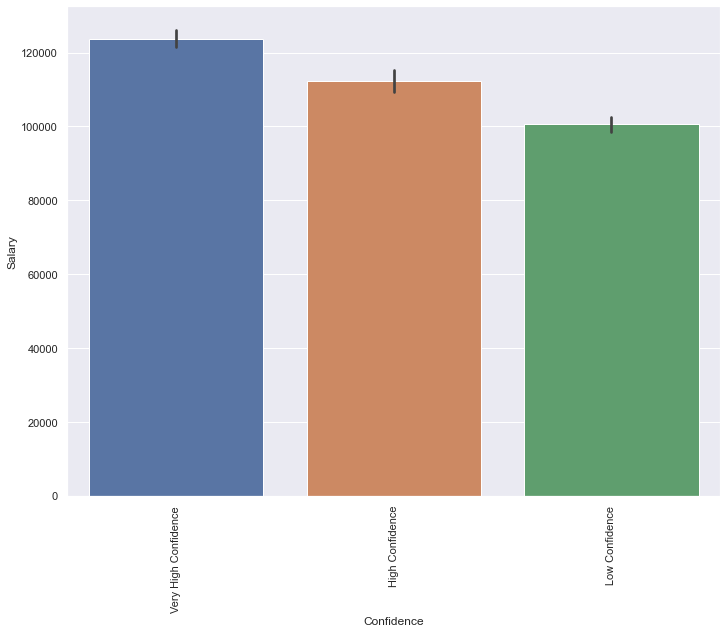

In [35]:
#bar plot of confidence with target variable

sns.barplot(x=df1.Confidence, y=df1.Salary)
  
plt.xlabel("Confidence")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

In [36]:
#value counts for cities

df1["City"] = df1["City"].str.upper()
df1["City"].value_counts()

AUSTIN, TX            40
BOSTON, MA            40
NEW YORK, NY          40
SAN JOSE, CA          40
FREMONT, CA           40
ARLINGTON, VA         40
PALO ALTO, CA         40
WASHINGTON, DC        40
LOS ANGELES, CA       39
CHICAGO, IL           39
IRVINE, CA            39
SAN DIEGO, CA         39
ATLANTA, GA           38
HOUSTON, TX           38
DALLAS, TX            38
COLUMBUS, OH          37
PORTLAND, OR          37
SAN FRANCISCO, CA     37
PHOENIX, AZ           37
DENVER, CO            37
MIAMI, FL             36
PHILADELPHIA, PA      36
BALTIMORE, MD         35
RALEIGH, NC           35
ST.LOUIS, MO          35
DETROIT, MI           35
SALT LAKE CITY, UT    35
SEATTLE, WA           34
KANSAS CITY, MO       34
MINNEAPOLIS, MN       34
CHARLOTTE, NC         34
ORLANDO, FL           33
INDIANAPOLIS, IN      33
CINCINNATI, OH        32
CLEVELAND, OH         32
LAS VEGAS, NV         19
Name: City, dtype: int64

In [37]:
df1[df1["City"].isna()]

,City,Company,Size,Type,Revenue,Headquarter,Founded,Industry,Job,Internship,Base_Pay,Low,25_%,75_%,High,Additional_Pay_Avg,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Low_Base,High_Base,Salary,Company_Type,Stock,C,C_Type


In [38]:
#create dictionary of cities with respective US geo areas 

city_dict = {'WEST': ['SAN DIEGO, CA', 'PORTLAND, OR', 'SAN FRANCISCO, CA', 'PALO ALTO, CA', 'IRVINE, CA' , 'FREMONT, CA', 'SAN JOSE, CA', 'SEATTLE, WA', 'SALT LAKE CITY, UT', 'LAS VEGAS, NV', 'LOS ANGELES, CA'],
            'NORTH_EAST': ['BALTIMORE, MD', 'PHILADELPHIA, PA', 'NEW YORK, NY', 'BOSTON, MA', 'WASHINGTON, DC'],
            'SOUTH': ['PHOENIX, AZ', 'AUSTIN, TX', 'HOUSTON, TX', 'ARLINGTON, VA', 'DALLAS, TX', 'MIAMI, FL', 'ATLANTA, GA', 'ORLANDO, FL', 'CHARLOTTE, NC', 'RALEIGH, NC'],
            'MIDWEST': ['MINNEAPOLIS, MN', 'CHICAGO, IL', 'DETROIT, MI', 'CLEVELAND, OH', 'DENVER, CO', 'ST.LOUIS, MO', 'COLUMBUS, OH', 'KANSAS CITY, MO', 'INDIANAPOLIS, IN', 'CINCINNATI, OH']}



In [39]:
#reverse dictinary to create map 

geo_map = {value: key for key in city_dict for value in city_dict[key]}

In [40]:
#create geogrpahical labels based on location

df1["Geo_Map"] = df1["City"].map(geo_map)
df1["Geo_Map"].value_counts()

WEST          399
SOUTH         369
MIDWEST       348
NORTH_EAST    191
Name: Geo_Map, dtype: int64

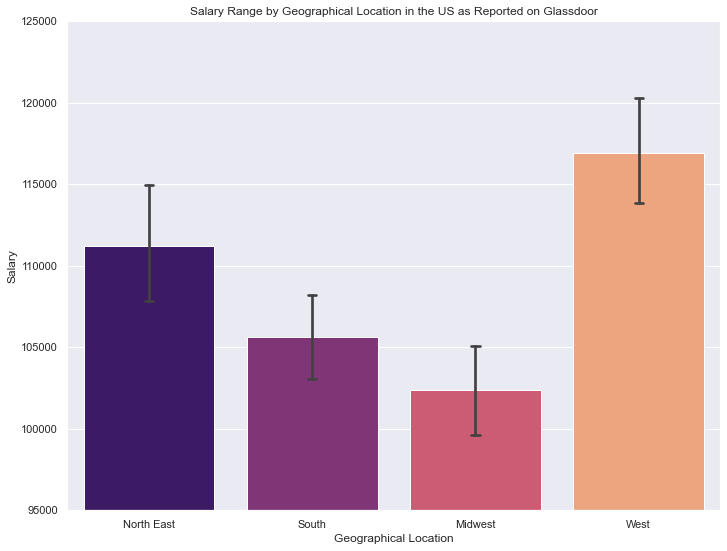

In [41]:
#bar plot of geo map with target variable

loc_bar = sns.barplot(x=df1.Geo_Map, y=df1.Salary, palette='magma', capsize=.05).set_title("Salary Range by Geographical Location in the US as Reported on Glassdoor")
  
plt.xlabel("Geographical Location")
plt.xticks([0,1,2,3],["North East", "South","Midwest","West"],rotation=0)
plt.ylabel("Salary")
plt.ylim(95000, 125000)
figure = loc_bar.get_figure()  
figure.savefig('location_bar.png', dpi=400)
plt.show()

In [42]:
#loading cost of living data 

col = pd.read_csv("./COL.csv")
col.head()

,Unnamed: 0,City,COL,Rent,COL_Plus_Rent,Purchasing_Power
0,0,"DALLAS, TX",67.72,50.13,59.58,131.77
1,1,"MIAMI, FL",78.96,64.31,72.18,74.75
2,2,"ATLANTA, GA",76.89,50.83,64.83,116.46
3,3,"DETROIT, MI",67.46,39.18,54.37,100.69
4,4,"CLEVELAND, OH",76.77,38.41,59.02,100.60


In [43]:
#merging cost of living with the dataset on the city in which the job was posted 
df1 = pd.merge(df1,col, on="City")


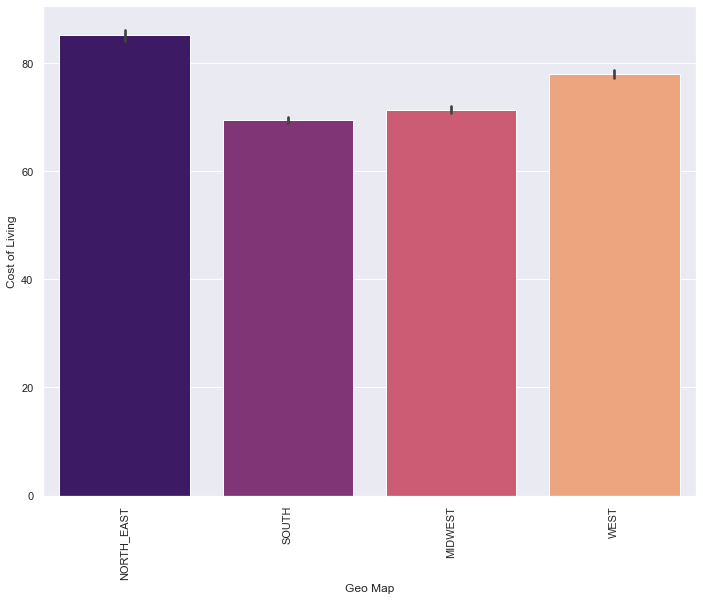

In [44]:
#bar plot of geo map with cost of living 

sns.barplot(x=df1.Geo_Map, y=df1.COL, palette='magma')
  
plt.xlabel("Geo Map")
plt.xticks(rotation=90)
plt.ylabel("Cost of Living")
plt.show()

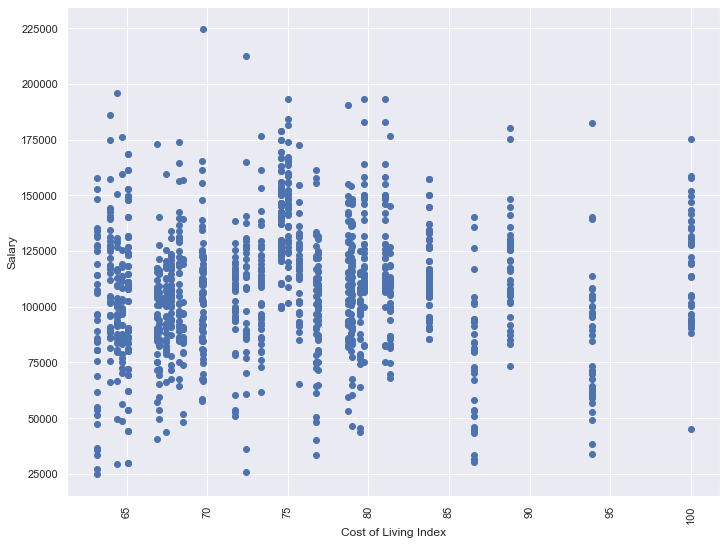

In [45]:
#scatter plot of cost of living with salary

plt.scatter(df1.COL, df1.Salary)
  
plt.xlabel("Cost of Living Index")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

In [46]:
#create dictionary of industry values 

industry_dict = { 'Education' : ['Education Training Services','Colleges & Universities', 'Primary or Secondary Education' , 'Preschool & Child Care', 'Local Government'],

'Government' :[ 'State & Regional Agencies','State & Regional Agencies','Municipal Governments','Aerospace & Defense', 'Federal Agencies', 'National Agencies', 'Aerospace & Defence'],

'Retail' :[ 'Casual Restaurants','General Repair & Maintenance','Grocery Stores & Supermarkets','Beauty & Personal Accessories Stores', 'Casual Restaurant', 'Pet & Pet Supplies Stores', 'Consumer Product Rental', 'Fast-Food & Quick-Service Restaurants', 'General Merchandise & Superstores', 'Other Retail Stores', 'Department, Clothing, & Shoe Stores', 'Wholesale', 'Office Supply Stores', 'Home Furniture & Housewares Stores',  'General Merchandise & Superstore', 'Consumer Electronics & Appliances Stores', 'Home Centers & Hardware Stores'],

'Service' : ['Religious Organizations','Express Delivery Services','Hotels, Motels, & Resorts','Consulting', 'Staffing & Outsourcing', 'Farm Support Services', 'Building & Personnel Service',   'Farm Support Service', 'Social Assistance', 'Membership Organizations'],

'Health' :[ 'Health Care Services & Hospitals',  'Health, Beauty, & Fitness',  'Biotech & Pharmaceuticals', 'Biotech & Pharmaceutical', 'Healthcare Services & Hospital'],

'Manufacturing' : [ 'Food & Beverage Manufacturing', 'Industrial Manufacturing', 'Construction', 'Health Care Products Manufacturing', 'Chemical Manufacturing', 'Food Production', 'Miscellaneous Manufacturing', 'Consumer Products Manufacturing',   'Industrial Manufacturing'],

'Finance' : ['Accounting', 'Venture Capital & Private Equity', 'Financial Analytics & Research', 'Banks & Building Society', 'Financial Transaction Processing', 'Brokerage Services', 'Investment Banking & Asset Management', 'Banks & Credit Unions', 'Insurance Agencies & Brokerage', 'Insurance Agencies & Brokerages', 'Insurance Operator', 'Lending',  'Insurance Carriers'],

'Communications' : ['Advertising & Marketing', 'TV Broadcast & Cable Networks', 'Photography', 'Cable, Internet & Telephone Providers', 'Publishing', 'Telecommunications Service', 'Telecommunications Services', 'TV Broadcast & Cable Networks'],

'Entertainment' : [ 'Sports & Recreation','Motion Picture Production & Distribution', 'Music Production & Distribution', 'Video Games', 'Video Game'],

'Technology' : ['Enterprise Software & Network Solutions', 'Internet', 'Computer Hardware & Software', 'IT Services', 'Legal', 'Health, Beauty & Fitness', 'Research & Development', 'IT Service', 'Electrical & Electronic Manufacturing'],

'Construction_Real_Estate' : ['Building & Personnel Services','Architectural & Engineering Services','Building & Personnel Services','Architectural & Engineering Service',  'Real Estate', 'Home Centres & Hardware Stores', 'Construction'],
                 
'Energy_Transportation' : ['Car Rental','Rail','Cruise Ships','Oil & Gas Services','Airlines','Automotive Parts & Accessories Stores','Vehicle Dealers', 'Utilities', 'Oil & Gas Service', 'Oil & Gas Exploration & Production', 'Logistics & Supply Chain', 'Energy', 'Transportation Management',  'Transportation Equipment Manufacturing',  'Transport Equipment Manufacturing', 'Gas Stations'],

'Not_Available' : '0'}

In [47]:
#reverse dictinary to create map 

industry_map = {value: key for key in industry_dict for value in industry_dict[key]}

In [48]:
df1["Industry_Map"] = df1["Industry"].map(industry_map)

In [49]:
df1[df1["Industry_Map"].isna()]

,City,Company,Size,Type,Revenue,Headquarter,Founded,Industry,Job,Internship,Base_Pay,Low,25_%,75_%,High,Additional_Pay_Avg,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Low_Base,High_Base,Salary,Company_Type,Stock,C,C_Type,Geo_Map,Unnamed: 0,COL,Rent,COL_Plus_Rent,Purchasing_Power,Industry_Map


In [50]:
#value counts for industry map 

df1["Industry_Map"].value_counts()

Technology                  479
Finance                     211
Service                     100
Health                       91
Energy_Transportation        77
Government                   75
Communications               66
Not_Available                59
Retail                       57
Manufacturing                45
Education                    15
Entertainment                15
Construction_Real_Estate     15
Name: Industry_Map, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Service'),
  Text(1, 0, 'Government'),
  Text(2, 0, 'Technology'),
  Text(3, 0, 'Communications'),
  Text(4, 0, 'Manufacturing'),
  Text(5, 0, 'Not_Available'),
  Text(6, 0, 'Finance'),
  Text(7, 0, 'Health'),
  Text(8, 0, 'Education'),
  Text(9, 0, 'Construction_Real_Estate'),
  Text(10, 0, 'Retail'),
  Text(11, 0, 'Energy_Transportation'),
  Text(12, 0, 'Entertainment')])

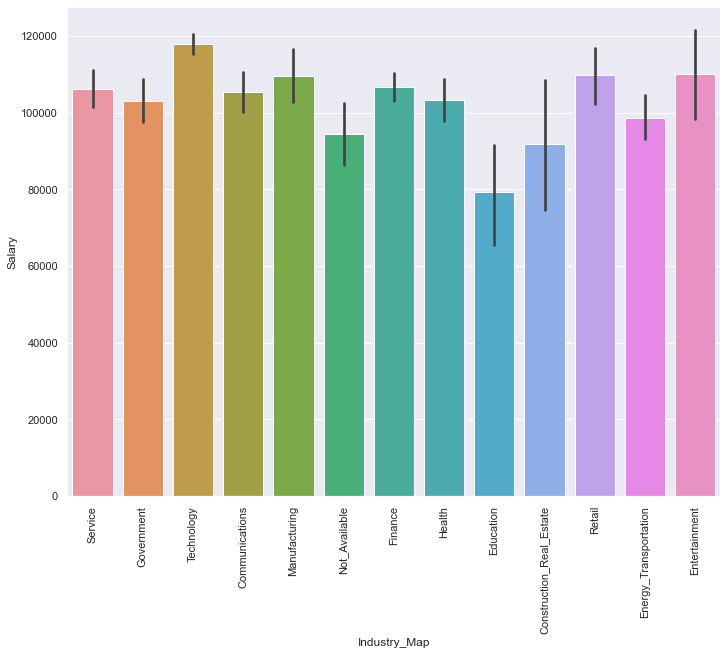

In [51]:
#bar plot of industry with salary

sns.barplot(x=df1.Industry_Map, y=df1.Salary)
plt.xticks(rotation=90)


In [52]:
#create simplified industry mapping 

industry_count = df1["Industry_Map"].value_counts()
other_industry = list(industry_count[industry_count < 200].index)
df1["Industry_Final"] = df1["Industry_Map"].replace(other_industry, "Other")
df1["Industry_Final"].value_counts()

Other         615
Technology    479
Finance       211
Name: Industry_Final, dtype: int64

(array([0, 1, 2]),
 [Text(0, 0, 'Other'), Text(1, 0, 'Technology'), Text(2, 0, 'Finance')])

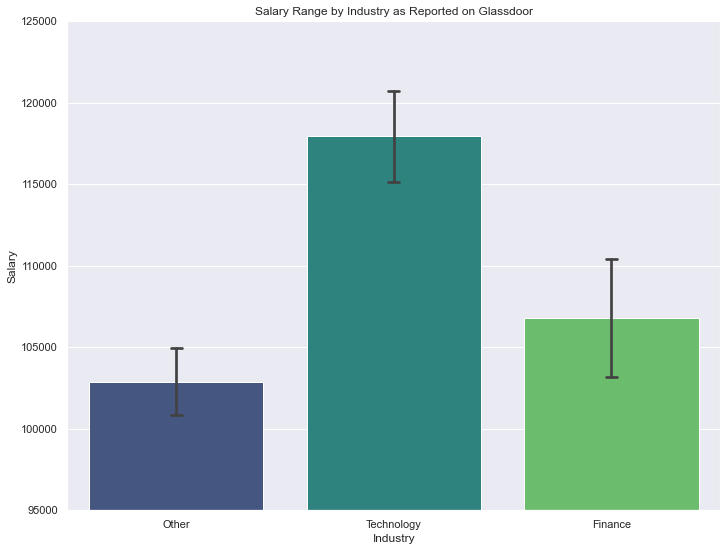

In [53]:
#bar plot of industry final with salary

ind_bar = sns.barplot(x=df1.Industry_Final, y=df1.Salary, palette='viridis', capsize=.05).set_title("Salary Range by Industry as Reported on Glassdoor")
plt.xlabel("Industry")
plt.ylim(95000,125000)
figure = ind_bar.get_figure()  
figure.savefig('industry_bar.png', dpi=400)
plt.xticks(rotation=0)

In [54]:
#Addressing values in Founded Predictor

df1["Founded"] = df1["Founded"].fillna(2021)
df1["Founded"] = df1["Founded"].replace(0, df1["Founded"].median())

#correcting founded year for incoorect variables

df1.loc[df1['Company'] == "University of California Berkeley", 'Founded'] = 1868
df1.loc[df1['Company'] == "Chubb", 'Founded'] = 1967

In [55]:
#Create age variable 

df1["Age"] = 2021 - df1["Founded"]

In [56]:
df1[df1["Age"]>500]

,City,Company,Size,Type,Revenue,Headquarter,Founded,Industry,Job,Internship,Base_Pay,Low,25_%,75_%,High,Additional_Pay_Avg,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Low_Base,High_Base,Salary,Company_Type,Stock,C,C_Type,Geo_Map,Unnamed: 0,COL,Rent,COL_Plus_Rent,Purchasing_Power,Industry_Map,Industry_Final,Age


<AxesSubplot:xlabel='Additional_Pay_Avg', ylabel='Count'>

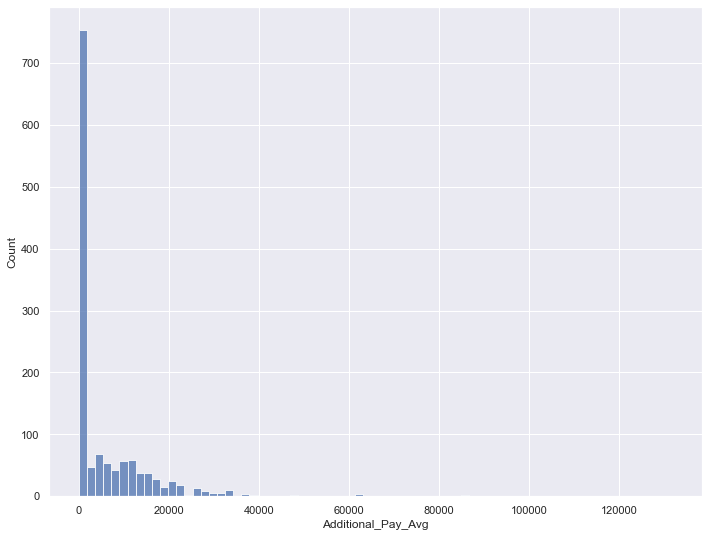

In [57]:
#checking distribution of additional pay 

sns.histplot(data=df1, x="Additional_Pay_Avg")

In [58]:
#very skewed data. 
#boxcox transformation used to transform data

import numpy as np
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')


In [59]:
#identifying lambda for the column values 

data = df1["Additional_Pay_Avg"].values.reshape(-1, 1)
pt.fit(data)
additional_lam = pt.lambdas_
print(additional_lam)

[-0.08746948]


In [60]:
#use boxcox transformation on data 

df1["Additional_Pay_Avg"] = boxcox1p(df1['Additional_Pay_Avg'],additional_lam )

<AxesSubplot:xlabel='Additional_Pay_Avg', ylabel='Count'>

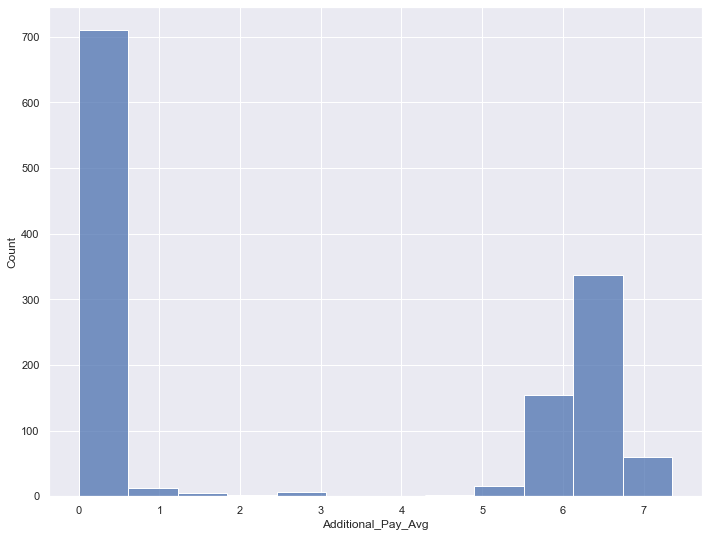

In [61]:
sns.histplot(data=df1, x="Additional_Pay_Avg")

In [62]:
#replace values with binary coded variable

df1["Additional_Pay_bin"] = pd.cut(df1.Additional_Pay_Avg,bins=[-1,2,8],labels=['Low','High'])

In [63]:
#checking values in binary additonal pay 

df1["Additional_Pay_bin"].value_counts()

Low     728
High    577
Name: Additional_Pay_bin, dtype: int64

In [64]:
#check for null values in column
df1[df1["Additional_Pay_bin"].isna()]

,City,Company,Size,Type,Revenue,Headquarter,Founded,Industry,Job,Internship,Base_Pay,Low,25_%,75_%,High,Additional_Pay_Avg,Cash_Bonus,Stock_Bonus,Total_Pay,Confidence,Reviews,Jobs,Salaries,Interviews,Benefits,Low_Base,High_Base,Salary,Company_Type,Stock,C,C_Type,Geo_Map,Unnamed: 0,COL,Rent,COL_Plus_Rent,Purchasing_Power,Industry_Map,Industry_Final,Age,Additional_Pay_bin


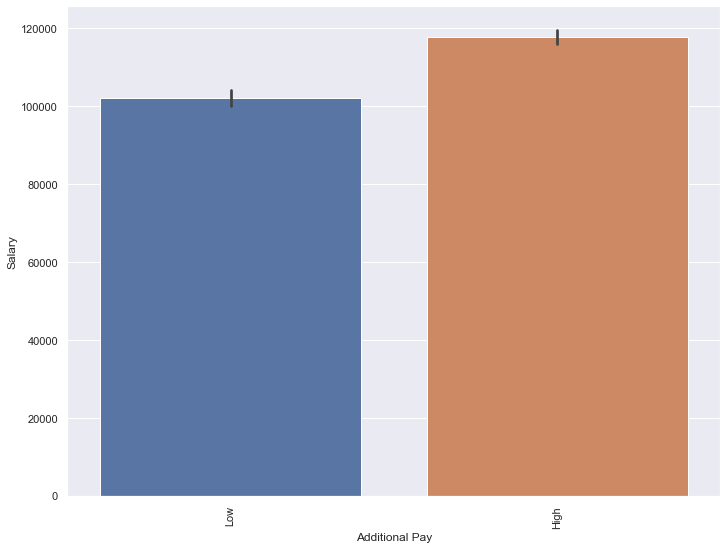

In [65]:
#bar plot of additional pay with salary

sns.barplot(x=df1.Additional_Pay_bin, y=df1.Salary)
  
plt.xlabel("Additional Pay")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

<AxesSubplot:xlabel='Interviews', ylabel='Count'>

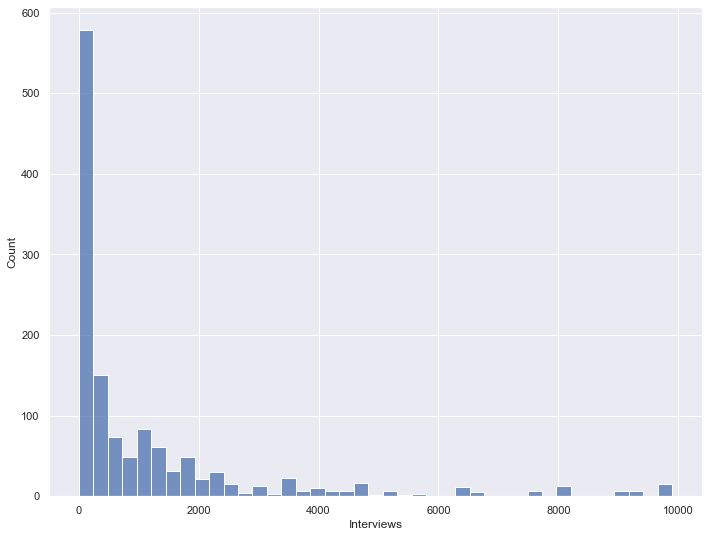

In [66]:
#checking distribution of interviews 

sns.histplot(data=df1, x="Interviews")

In [67]:
#identifying lambda for the column values 

data1 = df1["Interviews"].values.reshape(-1, 1)
pt.fit(data1)
interview_lam = pt.lambdas_
print(interview_lam)

[0.13183271]


In [68]:
#use boxcox transformation on data 

df1["Interviews"] = boxcox1p(df1["Interviews"],interview_lam )

<AxesSubplot:xlabel='Interviews', ylabel='Count'>

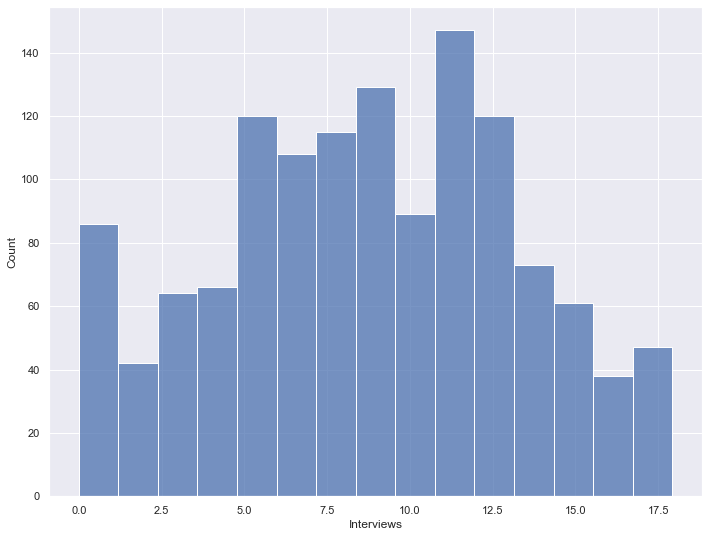

In [69]:
#checking distribution of interviews 

sns.histplot(data=df1, x="Interviews")

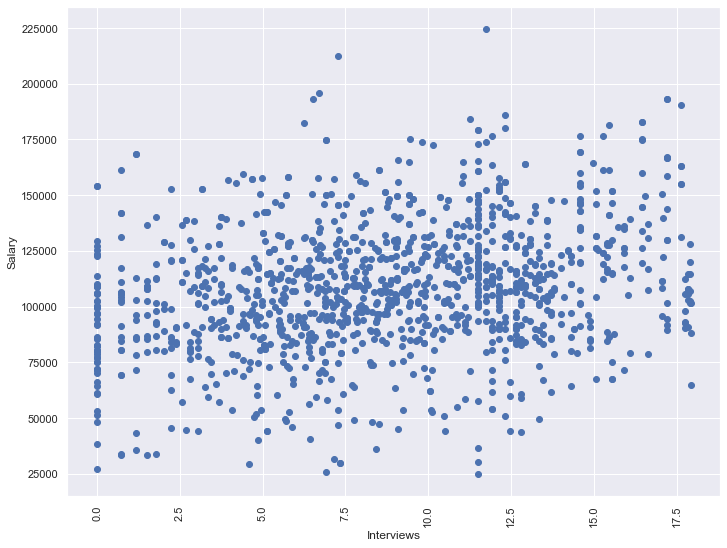

In [70]:
#scatter plot of interviews with salary

plt.scatter(df1.Interviews, df1.Salary)
  
plt.xlabel("Interviews")
plt.xticks(rotation=90)
plt.ylabel("Salary")
plt.show()

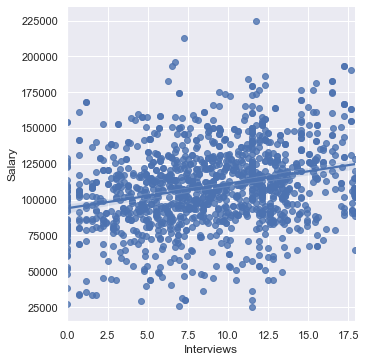

In [71]:
#lm plot of interviews with salary


sns.lmplot(x="Interviews", y="Salary", data=df1)

<AxesSubplot:xlabel='Low', ylabel='Count'>

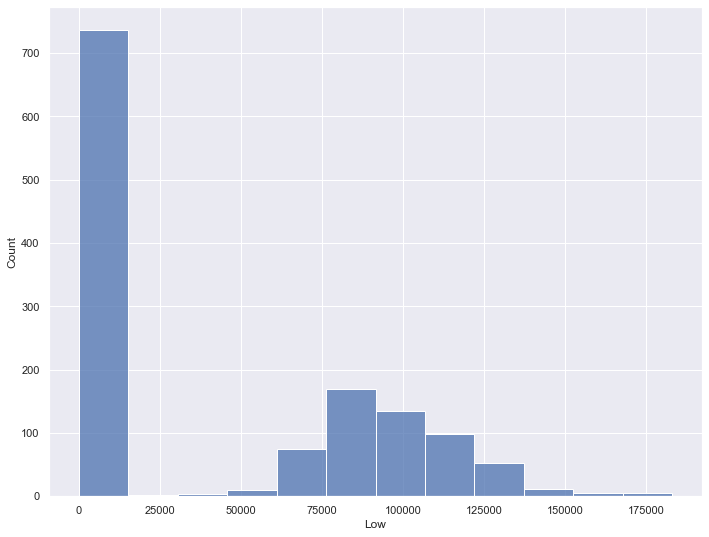

In [72]:
#checking distribution of low value 

sns.histplot(data=df1, x="Low")

In [73]:
#count for internship column 

df1["Internship"].value_counts()

0                 1154
INTERNSHIP         124
CONTRACTOR          16
PART TIME            7
SELF-EMPLOYED        2
FREELANCE            1
TEMPORARY TIME       1
Name: Internship, dtype: int64

In [74]:
#create binary internship variable

intern_count = df1["Internship"].value_counts()
intern = list(intern_count[intern_count<300].index)
df1["Internship"] = df1["Internship"].replace(intern, "INTERN / PART TIME")
df1["Internship"].value_counts()

0                     1154
INTERN / PART TIME     151
Name: Internship, dtype: int64

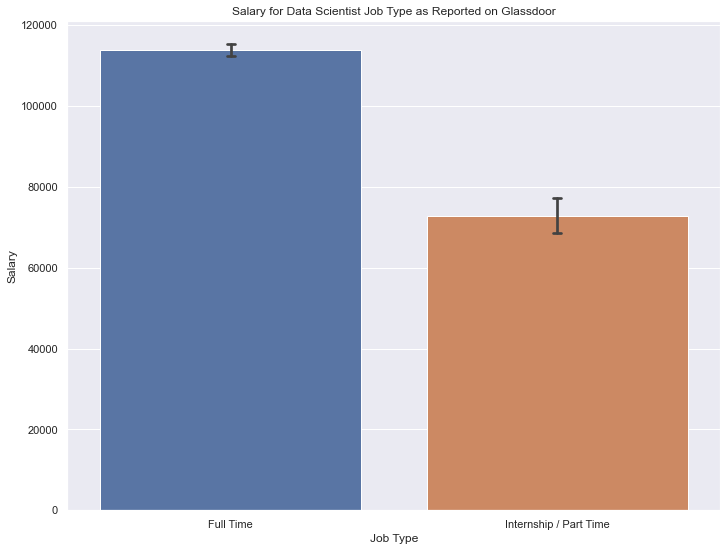

In [75]:
#bar plot of binary internship with salary

intern_bar = sns.barplot(x=df1.Internship, y=df1.Salary, capsize=.025).set_title("Salary for Data Scientist Job Type as Reported on Glassdoor")
  
plt.xlabel("Job Type")
plt.xticks([0,1],["Full Time", "Internship / Part Time"])
plt.ylabel("Salary")
figure = intern_bar.get_figure()  
figure.savefig('inernship_barplot.png', dpi=400)
plt.show()

In [76]:
df1.dtypes

City                    object
Company                 object
Size                    object
Type                    object
Revenue                 object
Headquarter             object
Founded                float64
Industry                object
Job                     object
Internship              object
Base_Pay                object
Low                      int64
25_%                     int64
75_%                     int64
High                     int64
Additional_Pay_Avg     float64
Cash_Bonus               int64
Stock_Bonus              int64
Total_Pay                int64
Confidence              object
Reviews                  int64
Jobs                     int64
Salaries                 int64
Interviews             float64
Benefits                 int64
Low_Base                 int64
High_Base                int64
Salary                 float64
Company_Type            object
Stock                   object
C                       object
C_Type                  object
Geo_Map 

In [77]:
#create sub df of variables of interest 
cols = ["Industry_Map", "C_Type","C","Stock","City","Company","Type", 
        "Headquarter","Founded","Industry", "Job","Low_Base","High_Base", 
        "Base_Pay", "Additional_Pay_Avg","Unnamed: 0"]
salary_simplified = df1.drop(cols, axis=1)




In [78]:
#check column types 

salary_simplified.dtypes

Size                    object
Revenue                 object
Internship              object
Low                      int64
25_%                     int64
75_%                     int64
High                     int64
Cash_Bonus               int64
Stock_Bonus              int64
Total_Pay                int64
Confidence              object
Reviews                  int64
Jobs                     int64
Salaries                 int64
Interviews             float64
Benefits                 int64
Salary                 float64
Company_Type            object
Geo_Map                 object
COL                    float64
Rent                   float64
COL_Plus_Rent          float64
Purchasing_Power       float64
Industry_Final          object
Age                    float64
Additional_Pay_bin    category
dtype: object

In [79]:
salary_simplified.shape

(1305, 26)

In [80]:
#save df 

salary_simplified.to_csv("salary_logged_data_all_cities.csv", index=False)